# Analysis of customer behavior of a telecommunications company

#### Task.
The company provides Internet access and video content services. The task is to predict which customers will want to terminate the contract.

#### Goals.
Keeping an existing client is cheaper than attracting a new one. If a customer wants to leave, you can make a discount and help them solve the problems they face. This is a completely different approach than to a new client. To impose a new service on regular customers, increase the fee imperceptibly. Stop running ads on it.

#### Incoming parameters.
telecom_users.csv customer database

customerID – id of the client
gender-gender of the client (male/female)
SeniorCitizen – whether the client is a pensioner (1, 0)
Partner – whether the client is married (Yes, No)
Dependents – whether the client has dependents (Yes, No)
tenure – how many months a person has been a client of the company
PhoneService – whether the phone service is enabled (Yes, No)
MultipleLines – whether multiple phone lines are connected (Yes, No, No phone service)
InternetService-the client's Internet provider (DSL, Fiber optic, No)
OnlineSecurity – whether the online security service is enabled (Yes, No, No internet service)
OnlineBackup – connected online backup service (Yes, No, No internet service)
DeviceProtection – does the client have insurance equipment (Yes, No, No internet service)
TechSupport – if the service of technical support (Yes, No, No internet service)
StreamingTV – connected if streaming TV (Yes, No, No internet service)
StreamingMovies – connected if streaming cinema (Yes, No, No internet service)
Contract – contract type customer (Month-to-month, One year, Two year)
PaperlessBilling – whether the client uses paperless billing (Yes, No)
PaymentMethod-payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges – the current monthly payment amount
TotalCharges – the total amount that the customer paid for the services for the entire time
Churn-whether there was an outflow (Yes or No)


 &nbsp;&nbsp;&nbsp;&nbsp; <b>`Churn`</b> – what we are investigating<br>

### To download the correct libraries and data

In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

#import machine learning
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 

from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.externals import joblib #save model

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve


%matplotlib inline

In [90]:
df = pd.read_csv('telecom_users.csv', delimiter=',')
df # View the table. Our Churn is at the end on the right

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [7]:
df.info()
# Almost all values are object, which means the task is categorical. In the future we will take this into account when choosing training models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [8]:
df.isnull().sum()# let's check if there are any null

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### We were lucky!
 
No missing values, no problems with duplicates, errors, and outliers. Since the task is categorical, you do not need to do normalization. The work will be reduced significantly.
Search for correlation.

To train the model, leave only the columns that affect Churn. To find a correlation, you need to translate categorical features into numeric ones, since the model does not understand Yes / No, but it will mathematically understand 1 or 0.

The table shows that the main values are Yes / No, but there are more signs. Let's explore the data deeper so that we don't miss anything. Here is the' Internet Service ' suspicious column.

### Search for correlation.

To train the model, leave only the columns that affect Churn. To find a correlation, you need to translate categorical features into numeric ones, since the model does not understand Yes / No, but it will mathematically understand 1 or 0.

The table shows that the main values are Yes / No, but there are more signs. Let's explore the data deeper so that we don't miss anything. Here is the' Internet Service ' suspicious column.

In [35]:
df['InternetService'].value_counts(dropna=False) 

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

Yes, 3 of the characteristic. There are others like it.

Then the data is already grouped by the number of features. In cycles, categorical features are replaced by 0,1,2 depending on the number of categories.

In [62]:
# delete the null column, it is not needed
df = df.drop(columns='Unnamed: 0')

# the gender attribute is converted to a number
df['gender'] = df['gender'].map({'Female': 0, 
                                 'Male': 1}).astype(int)

# Using a loop for columns with 2 categories: 'yes' or 'no'
list_yes_no = ['Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']
for column in list_yes_no:
    df[column] = df[column].map({'No': 0, 
                                 'Yes': 1}).astype(int)

# indication of phone lines in numbers (3 categories!)
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 
                                               'Yes': 1, 
                                               'No phone service': 2}).astype(int)

df['InternetService'] = df['InternetService'].map({'DSL': 0, 
                                                   'Fiber optic': 1, 
                                                   'No': 2}).astype(int)


list_3_categ = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# loop 
for column in list_3_categ:
    df[column] = df[column].map({'No': 0, 'Yes': 1, 
                                 'No internet service': 2}).astype(int)

df['Contract'] = df['Contract'].map({'Month-to-month': 0, 
                                     'One year': 1, 
                                     'Two year': 2}).astype(int)


df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 
                                               'Mailed check': 1, 
                                               'Bank transfer (automatic)': 2, 
                                               'Credit card (automatic)': 3}).astype(int)


However, we have two more categorical criteria - duration and MonthlyCharges, the number of months you use the services, and the monthly payment amount.

Without analysis, it is clear that there are too many months to divide them into categories, also with the second sign. So we'll break them up.

Experimentally, the graph shows that it makes no sense to divide the number into a larger number -4 is optimal. 

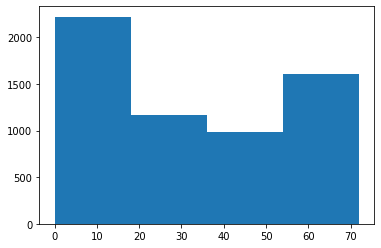

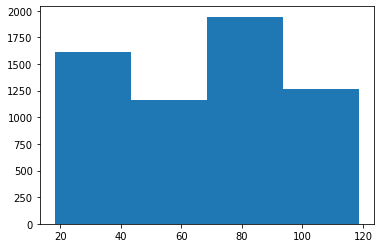

In [63]:
fig, subplot = plt.subplots()
subplot.hist(df['tenure'].values, bins=4, histtype='bar',
             align='mid', orientation='vertical');
fig, subplot = plt.subplots()
subplot.hist(df['MonthlyCharges'].values, bins=4, histtype='bar',
             align='mid', orientation='vertical');

In [64]:
# from the histograms around the dienes dipezona breakdown

df.loc[df['tenure'] <= 18, 'tenure'] = 0
df.loc[(df['tenure'] > 18) & (df['tenure'] <= 36), 'tenure'] = 1
df.loc[(df['tenure'] > 36) & (df['tenure'] <= 54), 'tenure'] = 2
df.loc[df['tenure'] > 54, 'tenure'] = 3

df.loc[df['MonthlyCharges'] <= 42, 'MonthlyCharges'] = 0
df.loc[(df['MonthlyCharges'] > 42) & (df['MonthlyCharges'] <= 70), 'MonthlyCharges'] = 1
df.loc[(df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 95), 'MonthlyCharges'] = 2
df.loc[df['MonthlyCharges'] > 95, 'MonthlyCharges'] = 3

Let's see how the table looks now

In [65]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,3,1,1,2,2,...,2,2,2,2,2,0,3,0.0,1734.65,0
1,9688-YGXVR,0,0,0,0,2,1,0,1,0,...,1,0,1,0,0,1,3,2.0,3973.2,0
2,9286-DOJGF,0,1,1,0,2,1,1,1,0,...,0,0,0,0,0,1,2,2.0,2869.85,1
3,6994-KERXL,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1.0,238.5,0
4,2181-UAESM,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1.0,119.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,1,0,1,0,0,1,0,1,1,...,0,0,1,1,0,1,0,2.0,95,1
5982,5982-PSMKW,0,0,1,1,1,1,1,0,1,...,1,1,1,1,2,1,3,2.0,2198.3,0
5983,8044-BGWPI,1,0,1,1,0,1,0,2,2,...,2,2,2,2,0,1,0,0.0,306.05,0
5984,7450-NWRTR,1,1,0,0,0,1,1,1,0,...,1,0,1,1,0,1,0,3.0,1200.15,1


In [66]:
# By the way, there is another way of splitting, without cycles. But in this case, it is not convenient.
#df = pd.get_dummies(df_main, columns =['gender','Partner'])

### Looking at the correlation

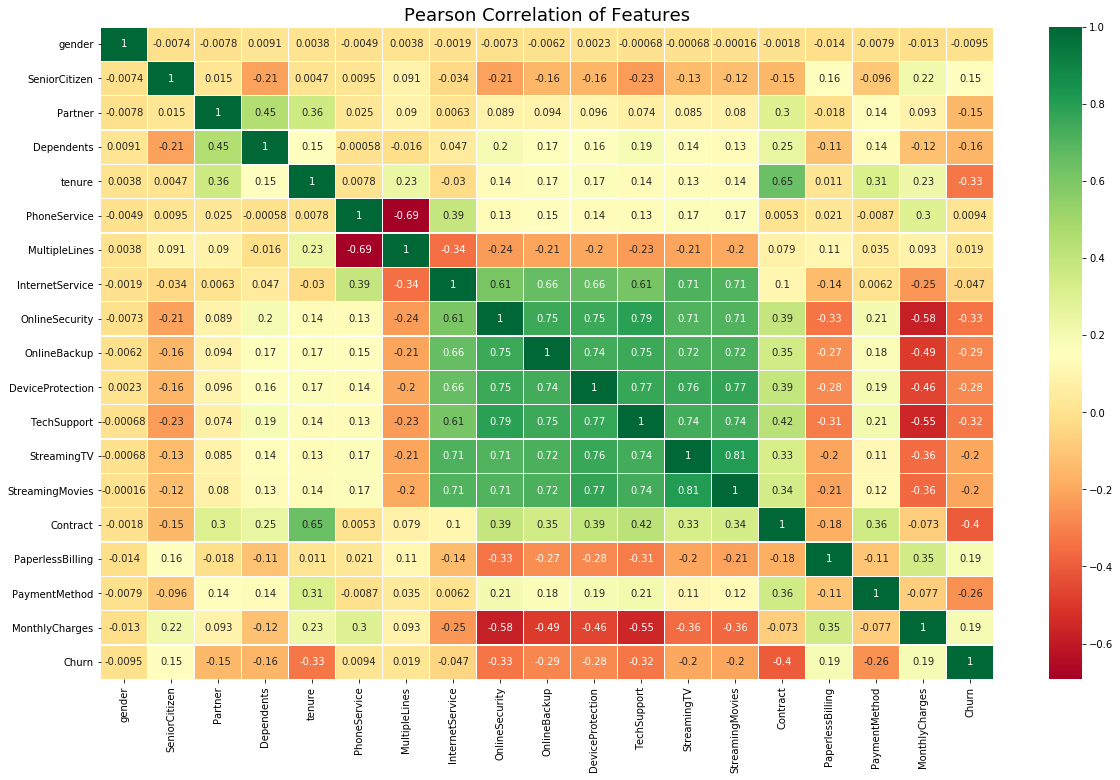

In [67]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('Pearson Correlation of Features', y=1.05, size=18)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

We see the following picture. Nothing strongly correlates with our investigated Churn trait. This is bad, but if there was such a connection, then you don't need a learning model.( For reference, 1 is a good correlation, 0 is a bad one)

We see a small negative correlation, especially with Contract. This is not for nothing, since this field indicates how much (month, year, or two) the client has signed the contract. Naturally, with a contract concluded for two years, the client is less likely to leave early.

Negative correlation shows that when the values of one attribute increase, the associated one decreases. But in our case, when we encoded the Churn attribute, we assigned Yes ( the client left) to 1, just so it is accepted. If, as in the sense of assigned 0, the correlation was positive.

Some features (green in the middle) strongly correlate with each other, but Churn is affected. They must be removed so that they do not knock down the model and do not affect the speed of operation.

Well, despite the generally poor relationship of useful features with Churn, let's try to train the model.

In [69]:
# to avoid redundancy of features, we will delete some features:
# just in case, we'll make a copy of the dataframe
df_main = df.copy()
drop_elements = ['PhoneService', 'StreamingMovies', 'StreamingTV', 
                 'TechSupport', 'DeviceProtection', 'OnlineBackup']
df_main = df_main.drop(drop_elements, axis=1)

# And we will also delete 3 attributes that have:
# - very weak "connections", and they can ruin our models by making noise.
# SeniorCitizen, Partner, Dependents 
drop_elements2 = ['customerID','SeniorCitizen', 'Partner', 'Dependents','TotalCharges']
df_main = df_main.drop(drop_elements2, axis=1)

## Training the model

#### Let's divide the model into a training test sample.

In [71]:
X = df_main.drop(['Churn'], axis=1)
y = df_main.Churn

TEST_SIZE = 0.3 
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

#### Let's go through the training models and look at their accuracy

In [73]:
#train XGBoost model

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test) 
print('XGBoost: {:.2f}'.format(xgb.score(X_test, y_test)))

y_test_preds_itog = xgb.predict(X) 

XGBoost: 0.79


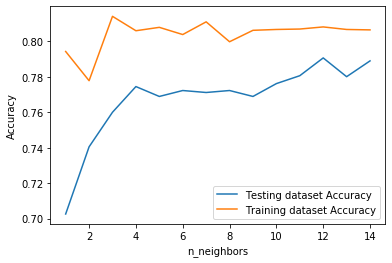

In [74]:
# KNeighborsClassifier 
# First let's see how many neighbors to take for training

neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy: {:.2f}'.format(knn.score(X_test, y_test)))
y_test_preds_knn = knn.predict(X) 

Accuracy: 0.77


In [76]:
# GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predicted_y = gbc.predict(X_test)
print('Accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))
y_test_preds_gbc = gbc.predict(X) 

Accuracy: 0.80


In [77]:
# LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state=40)
classifier.fit(X_train, y_train)
predicted_y = classifier.predict(X_test)
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
y_test_preds_classifier = gbc.predict(X) 

Accuracy: 0.80


In [81]:
# SVC
SVC_model = SVC()  
SVC_model.fit(X_train, y_train)
predicted_y = SVC_model.predict(X_test)
print('Accuracy: {:.2f}'.format(SVC_model.score(X_test, y_test)))     
y_test_preds_SVC_model = SVC_model.predict(X) 

Accuracy: 0.80


In [85]:
# GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted_y = clf.predict(X_test)
y_test_preds_clf = clf.predict(X) 
print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy: 0.74


In [86]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=40)
tree.fit(X_train, y_train)
predicted_y = tree.predict(X_test)
print('Accuracy: {:.2f}'.format(tree.score(X_test, y_test)))
y_test_preds_tree = tree.predict(X) 

Accuracy: 0.79


In [89]:
print('XGBoost: {:.2f}'.format(xgb.score(X_test, y_test)))
print('KNN: {:.2f}'.format(knn.score(X_test, y_test)))
print('GradientBoos: {:.2f}'.format(gbc.score(X_test, y_test)))
print('LogisticRegression: {:.2f}'.format(classifier.score(X_test, y_test)))
print('SVC: {:.2f}'.format(SVC_model.score(X_test, y_test)))     
print('GaussianNB: {:.2f}'.format(clf.score(X_test, y_test)))
print('tree: {:.2f}'.format(tree.score(X_test, y_test)))
df3 = pd.DataFrame({'|ACTUAL|': y, 'XGBoost': y_test_preds_itog,'KNN': y_test_preds_knn, 'Gradient': y_test_preds_gbc, 'LogisticR': y_test_preds_classifier, 'SVC_model': y_test_preds_SVC_model, 'GaussianNB': y_test_preds_clf, 'DecisionTree': y_test_preds_tree})
df3.sort_index().head(20) 
#df3.sort_index().tail(60) 

XGBoost: 0.79
KNN: 0.77
GradientBoos: 0.80
LogisticRegression: 0.80
SVC: 0.80
GaussianNB: 0.74
tree: 0.79


,|ACTUAL|,XGBoost,KNN,Gradient,LogisticR,SVC_model,GaussianNB,DecisionTree
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,0,1,0,1,1,0,1,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,1,0
7,0,0,1,1,1,0,1,0
8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


Let's see what happened.

ACTUAL - actual data (Churn column). Other predicted values.

Now it is important to choose the model we need. We see that in some cases, the model predicts the outflow of customers quite accurately, but also gives a lot of false predictions. In others, on the contrary, there are fewer false ones, but there are also few accurate ones.

The conclusion should be made by a person based not on mathematical estimates of accuracy, but on common sense. In this case, the best model is one that more accurately predicts outflow, even with false estimates. Additional work with clients will not hurt.

Then the selected model is saved and later integrated into Analytics systems.

http://web-inline.ru/ Comprehensive implementation of Analytics.